<a href="https://colab.research.google.com/github/Abdillah021/ecommerce-uk-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "/content/drive/MyDrive/porto_abdillah/dataset/data.csv"
df_full = pd.read_csv(url, encoding='latin1')

df_full.shape, df_full.head()

((541909, 8),
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
       InvoiceDate  UnitPrice  CustomerID         Country  
 0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
 1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
 2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
 3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
 4  12/1/2010 8:26       3.39     17850.0  United Kingdom  )

In [ ]:
df = df_full.sample(n=10000, random_state=42)  # 10.000 baris acak


In [ ]:
# Cek ukuran & info dataset
df.shape
df.info()

# Cek data teratas
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 209268 to 336297
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9969 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   7484 non-null   float64
 7   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 703.1+ KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,6/1/2011 12:05,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,5/27/2011 17:14,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,4/21/2011 17:05,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,11/16/2011 10:39,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,3/10/2011 8:40,9.95,13502.0,United Kingdom


In [ ]:
# Missing value
df.isnull().sum()

# Duplikat
df.duplicated().sum()

np.int64(1)

In [ ]:
# Hapus baris tanpa CustomerID
df = df.dropna(subset=['CustomerID'])

# Pastikan quantity & harga positif
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Buat kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Konversi InvoiceDate ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7323 entries, 209268 to 336297
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    7323 non-null   object        
 1   StockCode    7323 non-null   object        
 2   Description  7323 non-null   object        
 3   Quantity     7323 non-null   int64         
 4   InvoiceDate  7323 non-null   datetime64[ns]
 5   UnitPrice    7323 non-null   float64       
 6   CustomerID   7323 non-null   float64       
 7   Country      7323 non-null   object        
 8   TotalPrice   7323 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 572.1+ KB


In [ ]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,6485
France,179
Germany,177
EIRE,138
Spain,49
Netherlands,44
Belgium,35
Switzerland,31
Portugal,27


In [ ]:
##Produk terlaris
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,3312
GIN + TONIC DIET METAL SIGN,2107
PACK OF 72 RETROSPOT CAKE CASES,1903
JUMBO BAG RED RETROSPOT,1595
ASSORTED COLOURS SILK FAN,1332
JUMBO BAG STRAWBERRY,1049
RAIN PONCHO RETROSPOT,944
TRADITIONAL WOODEN SKIPPING ROPE,760
FELTCRAFT DOLL MOLLY,737


In [ ]:
# 10 Pelanggan dengan pembelian terbanyak
# Hitung total pembelian per customer
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers

,TotalPrice
CustomerID,
14646.0,4887.33
15749.0,3380.00
14156.0,2976.13
14911.0,2736.38
15769.0,2433.88
17450.0,2369.72
18102.0,2282.51
15838.0,1790.00
16029.0,1760.04


In [ ]:
# Hitung rata-rata
avg_top_customers = top_customers.mean()

avg_top_customers

np.float64(2621.763)

In [ ]:
#Analisis Waktu
# Ekstrak jam & hari
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Jam tersibuk
print(df.groupby('Hour')['InvoiceNo'].count())

# Hari tersibuk
print(df.groupby('DayOfWeek')['InvoiceNo'].count())


Hour
7       10
8      163
9      403
10     708
11     901
12    1309
13    1196
14     941
15     829
16     457
17     251
18      69
19      69
20      17
Name: InvoiceNo, dtype: int64
DayOfWeek
Friday        991
Monday       1206
Sunday       1166
Thursday     1504
Tuesday      1183
Wednesday    1273
Name: InvoiceNo, dtype: int64


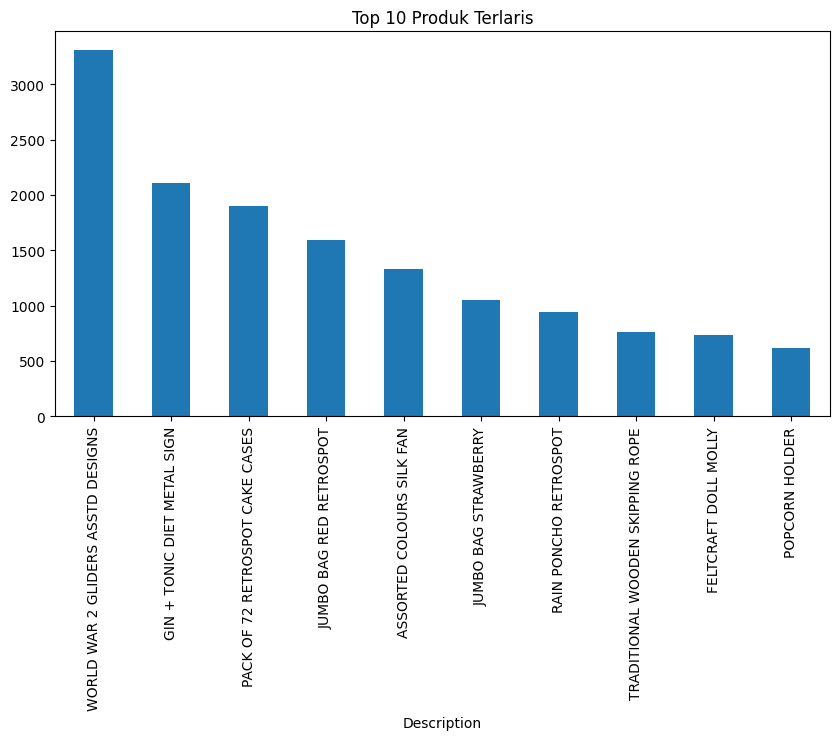

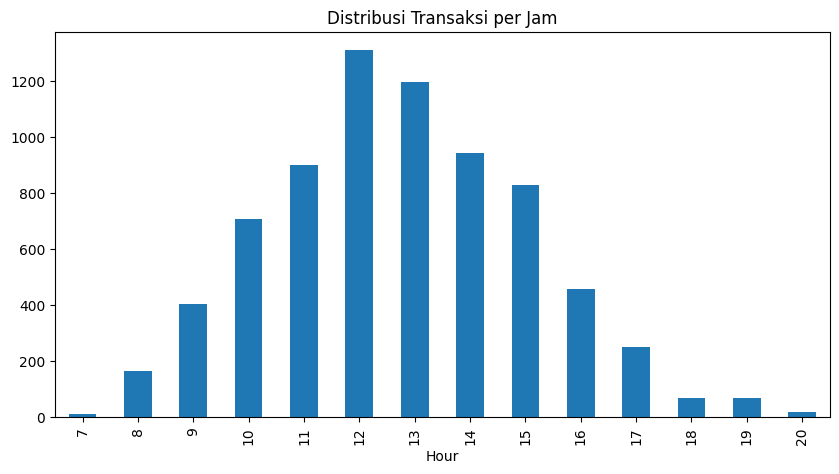

In [ ]:
import matplotlib.pyplot as plt

# Top produk
top_products.plot(kind='bar', figsize=(10,5), title="Top 10 Produk Terlaris")
plt.show()

# Distribusi jam transaksi
df.groupby('Hour')['InvoiceNo'].count().plot(kind='bar', figsize=(10,5), title="Distribusi Transaksi per Jam")
plt.show()

## 7. Insight & Kesimpulan
Mayoritas transaksi berasal dari United Kingdom

* Produk WORLD WAR 2 GLIDERS ASSTD DESIGNS menjadi yang paling laris

* Puncak transaksi terjadi pada jam 12 s.d jam 13

* Hari tersibuk adalah Hari Thursday ( Kamis )

* Rata-rata nilai pembelian pelanggan top mencapai 2,621.76 GBP

### Rekomendasi Bisnis:

* Optimasi pemasaran pada jam 12 – 13 dan hari Kamis untuk memaksimalkan penjualan.

* Fokuskan promosi pada produk WORLD WAR 2 GLIDERS ASSTD DESIGNS karena tingkat penjualannya tertinggi.

* Buat program loyalitas untuk pelanggan bernilai tinggi (pembelian > £2,500).

* Analisis penyebab retur untuk mengurangi potensi kerugian dan meningkatkan kepuasan pelanggan.